# Logistic Regression
In cases which demands probabilty calculations, we do not get to work with continous values but occurances, zeros and ones. In that case linear regression approach does not result in an accurate model. First of all we need to calculate a probabilty value as a result, and a probabilty is between 0 and 1. In the other hand, a linear model is reaches values beyond that limit. So, we need to apply an **activation function** to limit the output in the desired range. For this case **sigmoid function** is used. <br>
Now we need to consider our function as a nesting of two functions. Where:
$$g(x)=Ax+B$$
$$h(x)=\frac{1}{1+e^{-x}}$$
$$y(x)=h(g(x))$$

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, model_selection
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

Let's define a sample probabilty distribution using the equations above. We can assume a case like **probability of being +13 compared to height of that person**.

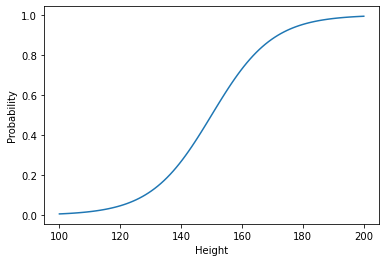

In [2]:
A = 0.1
B = -15

x_range = [100, 200]
X = np.linspace(x_range[0], x_range[1], 100)

def sigmoid(x):
    return 1/(1+np.exp(-x))

def linear(x,A,B):
    return A*x+B

def probability(x,A,B):
    return sigmoid(linear(x,A,B))


Y = probability(X,A,B)

plt.plot(X,Y)
plt.xlabel('Height')
plt.ylabel('Probability')
plt.show()

Now, using the **model** probility distribution, we synthesize a sample dataset.

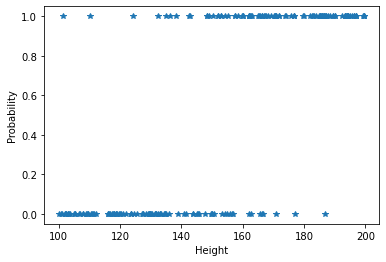

In [3]:
def load_dataset(n=200):
    x = (x_range[1] - x_range[0]) * np.random.rand(n) + x_range[0]
    p = probability(x,A,B)
    # Binomial function results in an 0-1 array which has the occurance probabilty indicated in p for each element.
    y = np.random.binomial(1, p)
    return np.array(y).reshape(-1,1), np.array(x).reshape(-1,1)

y, x = load_dataset()

plt.plot(x,y,'*')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.show()

For logistic regression, a custom loss function called **binary cross-entropoy** is used. It can be simply be written as below.
$$L = -log(y_{pred}) when y_{true}=1$$
$$L = -log(1-y_{pred}) when y_{true}=0$$
Using these conditions, we can derive a more general equation.
$$L = -\frac{1}{N} \sum y_{true}log(y_{pred})+(1-y_{true})log(1-y_{pred})$$
In order to calculate the gradient for this loss function, we use the chain rule.
$$\frac{\partial L}{\partial A}= \frac{\partial L}{\partial h}\frac{\partial h}{\partial g}\frac{\partial g}{\partial A}$$
$$\frac{\partial L}{\partial B}= \frac{\partial L}{\partial h}\frac{\partial h}{\partial g}\frac{\partial g}{\partial B}$$
Fortunately, we do not need to code it, nor calculate it again and again, as optimized libraries already exist.

## <font color=red>**Optional Exercise**</font>
Derive the equations for $\frac{\partial L}{\partial A}$ and $\frac{\partial L}{\partial B}$

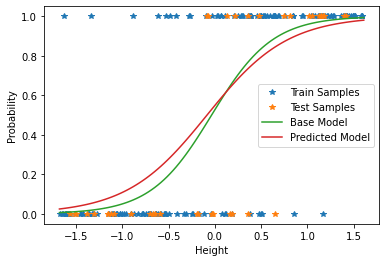

In [4]:
# First, we apply standardization, and split the data set as train and test.
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X.reshape(-1,1))

# We defined a regressor and then fitted our sample data. We could use two seperate lines: one for initializiation and
# for fitting. However, this approach is also correct.
regressor = linear_model.LogisticRegression().fit(X_train,y_train)

# If we used only predict method, we would get 1 for values over 0.5 and 0 for the below. We used proba to see
# probability distribution.
prediction = regressor.predict_proba(X.reshape(-1, 1))[:,1:3]
plt.plot(X_train,y_train,'*', label='Train Samples')
plt.plot(X_test,y_test,'*', label='Test Samples')
plt.plot(X,Y, label='Base Model')
plt.plot(X,prediction, label='Predicted Model')
plt.legend()
plt.xlabel('Height')
plt.ylabel('Probability')
plt.show()


In [5]:
print('Test Accuracy: ', regressor.score(X_test,y_test))

Test Accuracy:  0.825


## Predicting Heart Attack Probability

In this section, you are going to use the dataset given below, and predict the risk of heart attack. <br>
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

In [6]:
import pandas as pd
from sklearn.linear_model import SGDRegressor #gradient descent regression
from sklearn.datasets import load_boston # taking the data
from sklearn.datasets import make_regression # 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

PatientData = pd.read_csv('heart.csv')
PatientData.head()
print(PatientData.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### Step 1
Split data into y (target) and x (every other variable).

In [7]:
X = np.asarray(PatientData[['age', 'sex', 'cp','trestbps','chol','fbs','restecg','thalach', 'exang','oldpeak','slope','ca','thal']])
y = np.asarray(PatientData['target'])










### Step 2
Inspect data (visualizing, extracting correlations etc.), explain if logistic regression is a good fit for this purpose.

<AxesSubplot:>

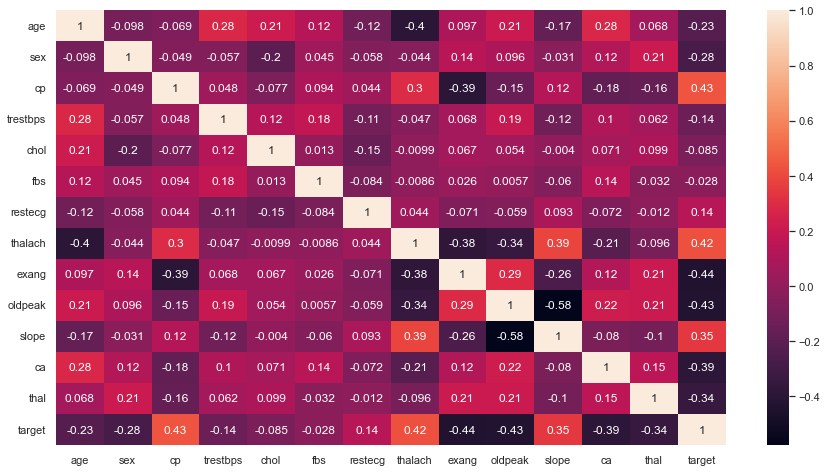

In [8]:
#to detect highly correlated features I created a heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data=PatientData.corr(), annot=True)


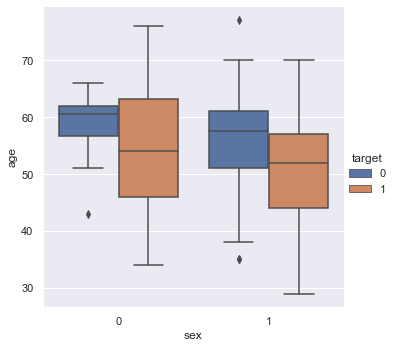

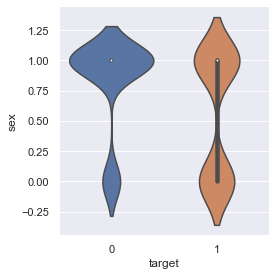

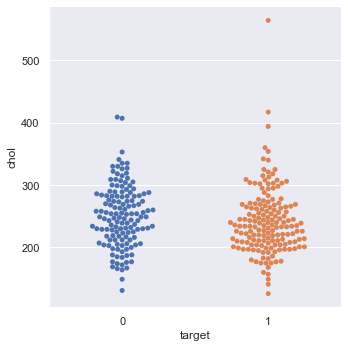

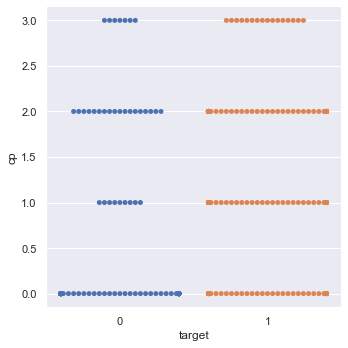

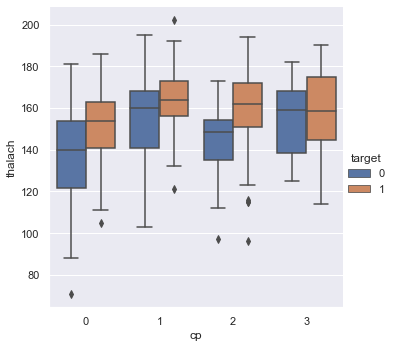

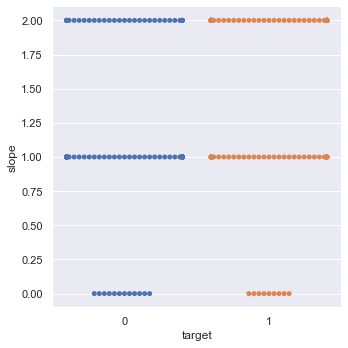

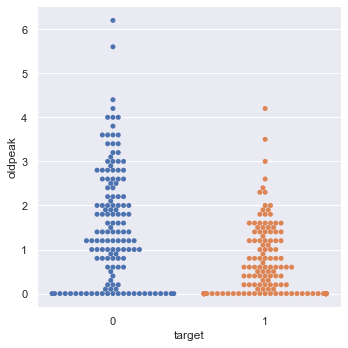

In [33]:
import seaborn as sns
#to see the effects of random and closely correlated couple of features I created some graphics


sns.catplot(x="sex", y = "age" ,hue="target",kind="box", ax=1,data=PatientData)
sns.catplot(x="target", y="sex", height =4 ,kind="violin", ax =2, data=PatientData)
sns.catplot(x="target", y="chol", kind="swarm", data=PatientData)
sns.catplot(x="target", y="cp", kind="swarm", data=PatientData)
sns.catplot(x="cp", y="thalach",hue="target", kind="box", data=PatientData)
sns.catplot(x="target", y="slope", kind="swarm", data=PatientData)
sns.catplot(x="target", y="oldpeak", kind="swarm", data=PatientData)
#Ill 

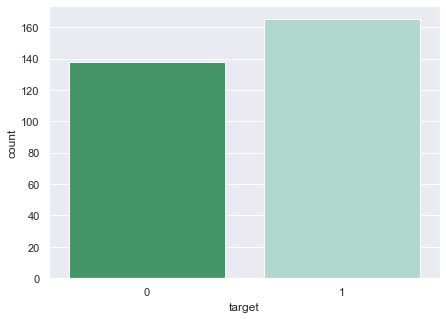

In [10]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (7, 5))
sn.countplot(x ='target', data = PatientData,palette ="BuGn_r" )
plt.show()

### Step 3
Split data into train and test.

In [11]:
X = preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


### Step 4
Standardize x data with respect to x_train.

In [12]:
#I standardized at the begining


### Step 5
Apply logistic regression.

In [13]:
logreg = linear_model.LogisticRegression().fit(X_train,y_train)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)

0.8688524590163934

### Step 6
Evaluate the accuracy of the model and make comment.

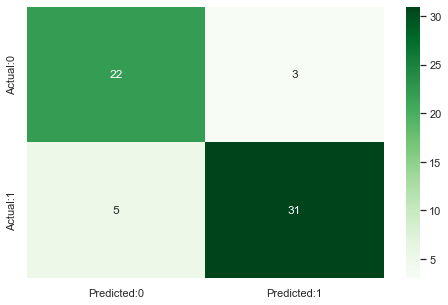

details of confusion matrix =
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [14]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sn.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
 
print('details of confusion matrix =')
print (classification_report(y_test, y_pred))
#Accuracy of the model is satisfying for this small dataset

## Feedback
What do you think your $\frac{Challenge}{Skill Level}$ ratio is? (<1 easy/boring, >1 hard/overwhelming, ~1 balanced)

<br>

If there are any part which is not clear to you, you can write down your questions here.